In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('diabetes.csv')


In [2]:
# Handling missing values ​​and outliers
# Filling 0 values ​​with the median
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_impute:
    # 计算中位数（排除 0 值）
    median_value = df[column][df[column] != 0].median()
    # 替换 0 值
    df[column] = df[column].replace(0, median_value)

In [3]:
# For the data set we selected, the data values ​​are clear and the indicators are obvious, so there is no need to Normalize and standardize

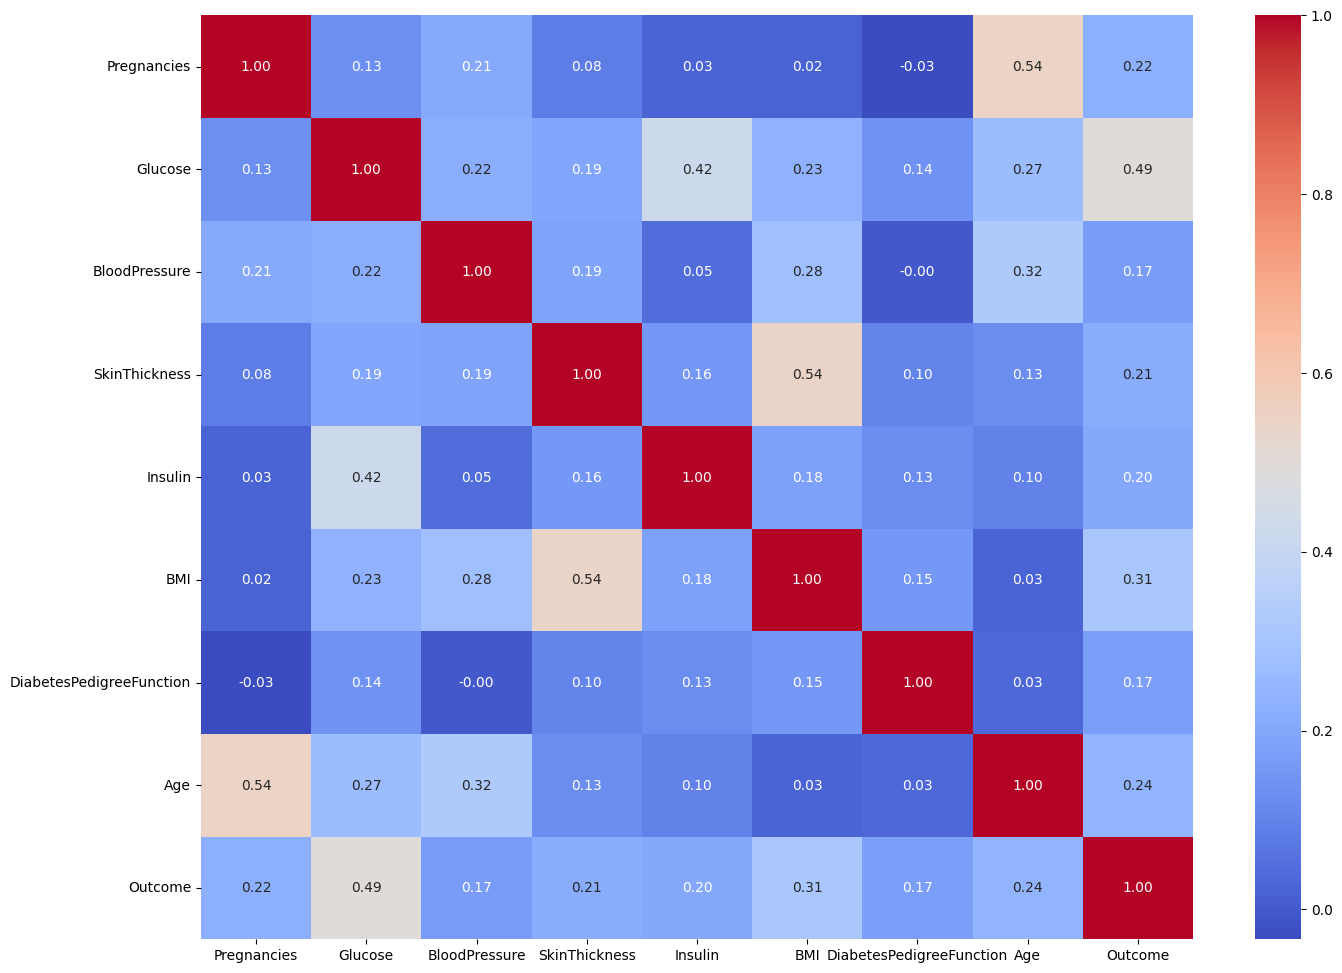

                    Feature  Importance
1                   Glucose    0.270023
5                       BMI    0.159131
6  DiabetesPedigreeFunction    0.129364
7                       Age    0.127462
4                   Insulin    0.083452
2             BloodPressure    0.082521
0               Pregnancies    0.077993
3             SkinThickness    0.070054


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Feature Selection Example
# Assuming Outcome is the target variable
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Outcome', axis=1)
y = df['Outcome']
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

In [5]:
# We choose all these attributes

In [6]:
# EDA

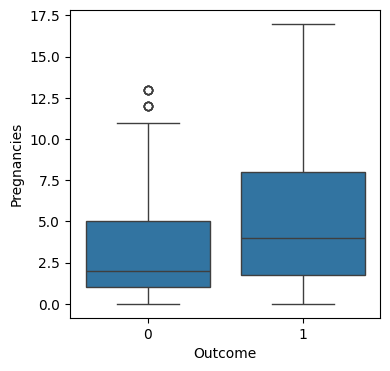

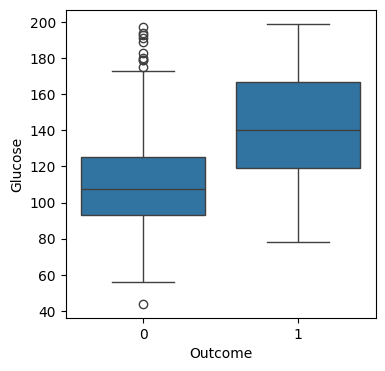

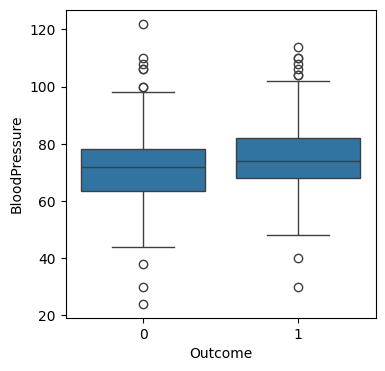

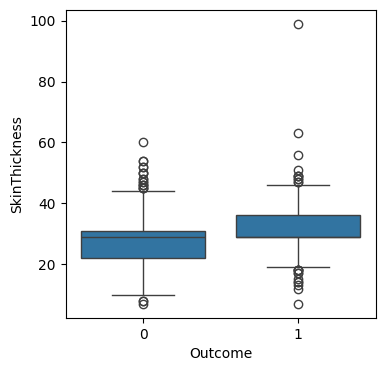

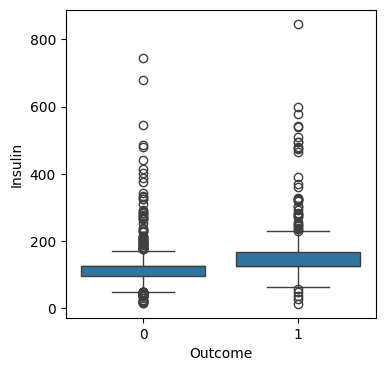

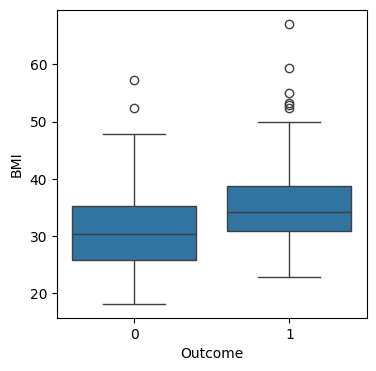

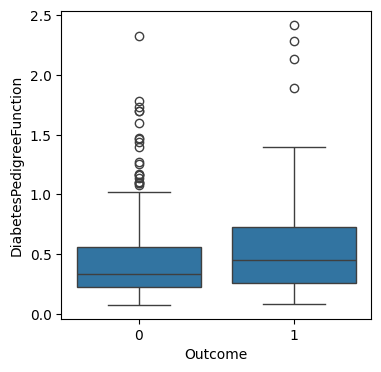

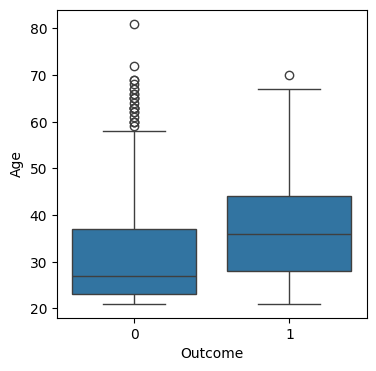

In [7]:
# Box Plot
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='Pregnancies')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='BloodPressure')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='SkinThickness')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='Insulin')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='BMI')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Outcome', y='Age')
plt.show()

In [8]:
from joblib import dump, load

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
dump(log_reg, 'log_reg.joblib')

Logistic Regression Accuracy: 0.7012987012987013


['log_reg.joblib']

In [12]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
dump(rf_model, 'rf_model.joblib')

Random Forest Accuracy: 0.7792207792207793


['rf_model.joblib']

In [13]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
dump(gb_model, 'gb_model.joblib')

Gradient Boosting Accuracy: 0.7597402597402597


['gb_model.joblib']

In [14]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
dump(xgb_model, 'xgb_model.joblib')

XGBoost Accuracy: 0.7662337662337663


['xgb_model.joblib']

In [15]:
# LightGBM
lgbm_model = LGBMClassifier(learning_rate=0.05, n_estimators=200, max_depth=3, min_child_samples=20)

lgbm_model.fit(X_train, y_train)
y_pred_lgb = lgbm_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
dump(lgbm_model, 'lgbm_model.joblib')

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


['lgbm_model.joblib']

In [16]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
    ],
    voting='soft'
    )

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
dump(voting_model, 'voting_model.joblib')

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

['voting_model.joblib']

In [17]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=42, shuffle=True)
for model in [log_reg, rf_model, gb_model, xgb_model, lgbm_model, voting_model]:
    scores = cross_val_score(model, X, y, cv=kf)
    print(f"{model.__class__.__name__} Cross-Validation Accuracy:", scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Cross-Validation Accuracy: 0.7720779220779221
RandomForestClassifier Cross-Validation Accuracy: 0.7564764183185236
GradientBoostingClassifier Cross-Validation Accuracy: 0.7590225563909774
XGBClassifier Cross-Validation Accuracy: 0.740909090909091
[LightGBM] [Info] Number of positive: 241, number of negative: 450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348770 -> initscore=-0.624451
[LightGBM] [Info] Start training from score -0.624451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 248, number of negative: 443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358900 -> initscore=-0.580141
[LightGBM] [Info] Start training from score -0.580141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Logistic Regression Confusion Matrix:
 [[81 19]
 [27 27]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

Random Forest Confusion Matrix:
 [[88 12]
 [22 32]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
   

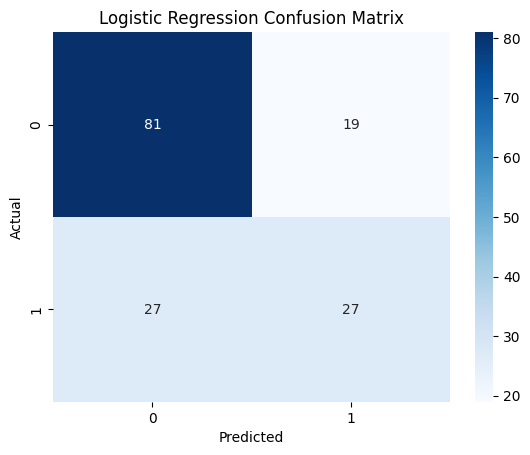

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



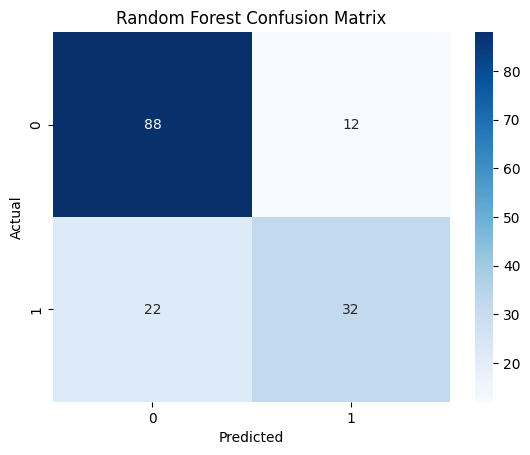

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



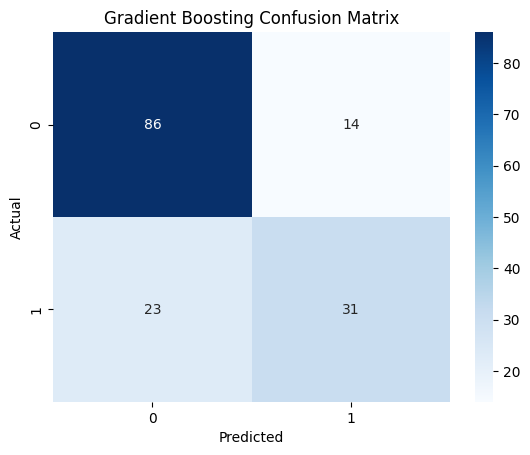

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



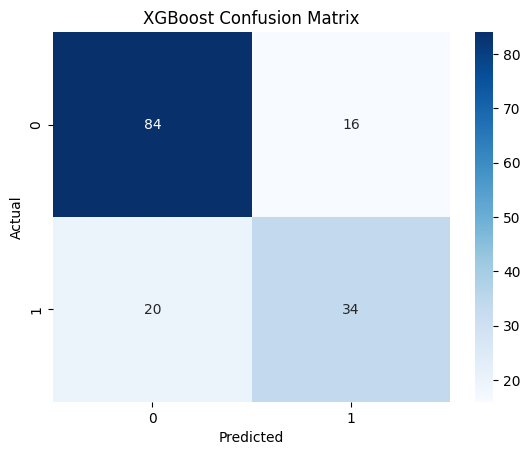

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



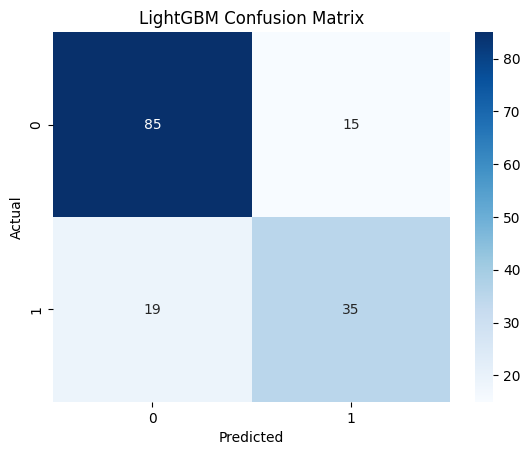

Voting Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



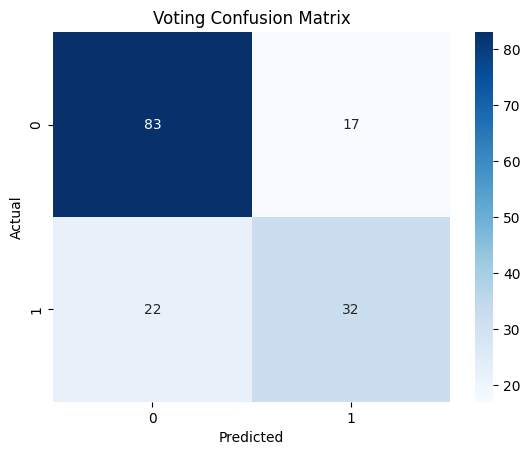

In [18]:
# Print classification reports for each model
for model, y_pred in zip(['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Voting'],
                          [y_pred_log_reg, y_pred_rf, y_pred_gb, y_pred_xgb, y_pred_lgb, y_pred_voting]):
    print(f"{model} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt
for model, y_pred in zip(['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Voting'],
                          [y_pred_log_reg, y_pred_rf, y_pred_gb, y_pred_xgb, y_pred_lgb, y_pred_voting]):
    print(f"{model} Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: LogisticRegression
Accuracy: 0.7013
Precision: 0.5870
Recall: 0.5000
F1 Score: 0.5400
AUC-ROC: 0.8130


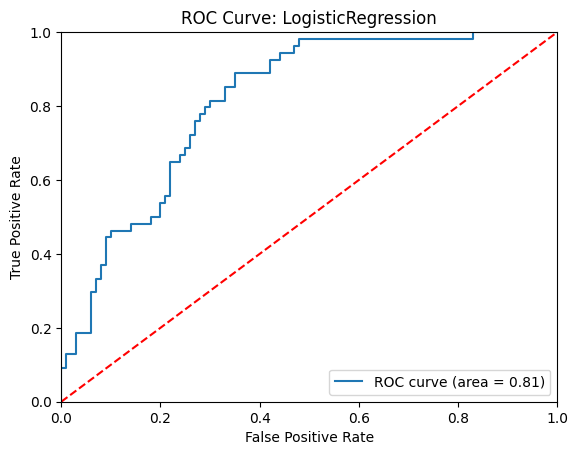

Model: RandomForestClassifier
Accuracy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1 Score: 0.6531
AUC-ROC: 0.8192


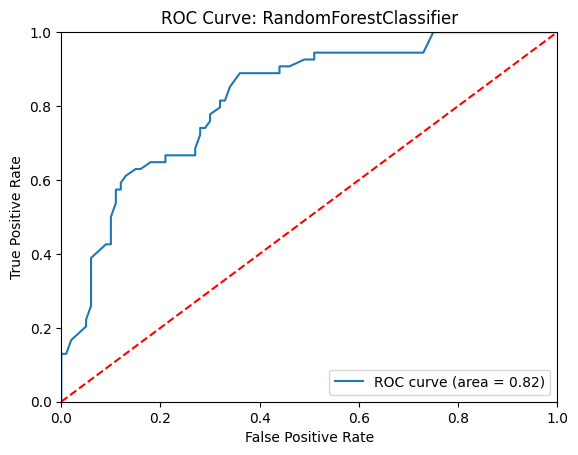

Model: GradientBoostingClassifier
Accuracy: 0.7597
Precision: 0.6889
Recall: 0.5741
F1 Score: 0.6263
AUC-ROC: 0.8317


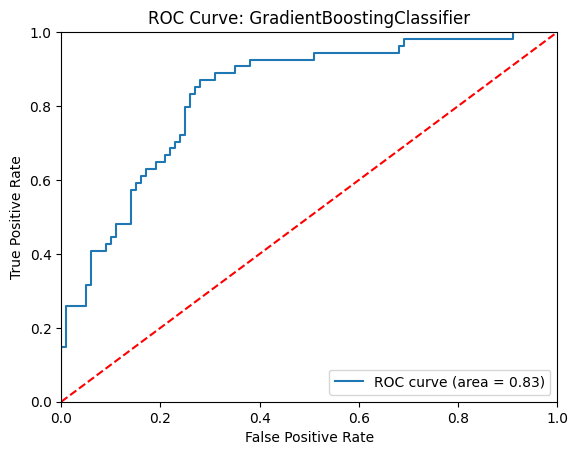

Model: XGBClassifier
Accuracy: 0.7662
Precision: 0.6800
Recall: 0.6296
F1 Score: 0.6538
AUC-ROC: 0.8204


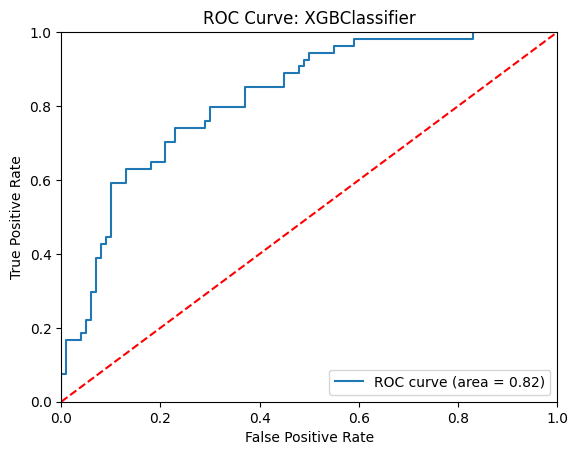

Model: LGBMClassifier
Accuracy: 0.7792
Precision: 0.7000
Recall: 0.6481
F1 Score: 0.6731
AUC-ROC: 0.8256


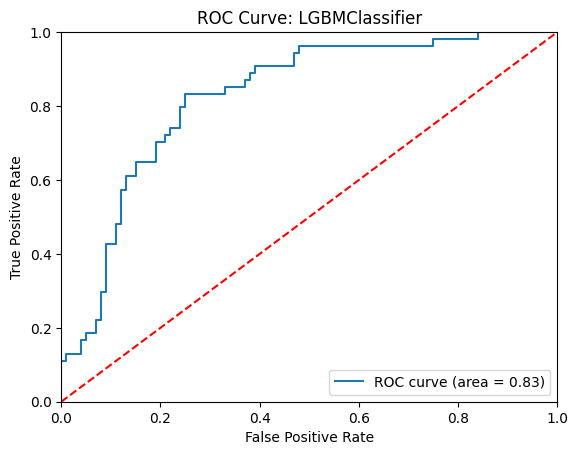

Model: VotingClassifier
Accuracy: 0.7468
Precision: 0.6531
Recall: 0.5926
F1 Score: 0.6214
AUC-ROC: 0.8311


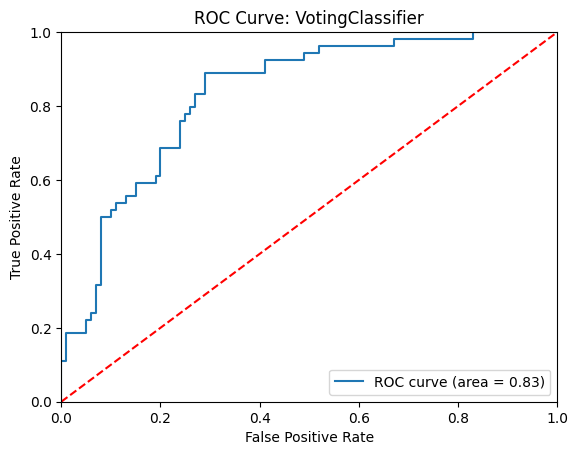

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define evaluate function
def evaluate_model(model, X_test, y_test):
    # Get predicted probabilities for ROC AUC calculation
    if model.__class__.__name__ == 'Sequential':  # Check if the model is a Keras model
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    # print ROC figure
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model.__class__.__name__}')
    plt.legend(loc='lower right')
    plt.show()

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model,
    'Voting Model': voting_model
}

# Evaluate every model
for model_name, model in models.items():
    evaluate_model(model, X_test, y_test)

In [20]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [48]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Set title
st.title("Healthcare Prediction Tool")

# Load pre-trained models
voting_model = joblib.load('voting_model.joblib')
lgbm_model = joblib.load('lgbm_model.joblib')

# Upload the data
st.header("Upload Your Dataset")
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
  # Read the uploaded file
  df = pd.read_csv(uploaded_file)
  st.write("Data Preview:")
  st.dataframe(df.head())

  # Choose target and features
  target = 'Outcome'
  features = df.columns.drop(target)

  # Prepare the data
  X = df[features]
  y = df[target]

  if st.button("Run Prediction"):
            # Predict using VotingClassifier
            voting_predictions = voting_model.predict(X)
            voting_results = pd.DataFrame({
                'Actual': y,
                'VotingClassifier_Predicted': voting_predictions
            })

            # Predict using LightGBM
            lgbm_predictions = lgbm_model.predict(X)
            lgbm_results = pd.DataFrame({
                'LightGBM_Predicted': lgbm_predictions
            })

            # Combine results into a single DataFrame
            combined_results = pd.concat([voting_results, lgbm_results], axis=1)

            # Display predictions
            st.header("VotingClassifier Predictions")
            st.write(voting_results)

            st.header("LightGBM Predictions")
            st.write(lgbm_results)

            st.header("Combined Predictions")
            st.write(combined_results)

            # Add a summary of predictions
            st.header("Prediction Summary")
            st.write("VotingClassifier Predictions:")
            st.write(pd.Series(voting_predictions).value_counts())
            st.write("LightGBM Predictions:")
            st.write(pd.Series(lgbm_predictions).value_counts())

            # Save combined predictions to CSV and allow download
            st.header("Download Combined Predictions")

            combined_csv = combined_results.to_csv(index=False).encode('utf-8')
            st.download_button(
                label="Download Combined Predictions as CSV",
                data=combined_csv,
                file_name='combined_predictions.csv',
                mime='text/csv',
            )

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.233.108:8501

⠼⠴⠦⠧⠇⠏⠋your url is: https://six-boxes-retire.loca.lt
